<a href="https://colab.research.google.com/github/tim530712345/AI_-20210602/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千

In [29]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# DataFrame: 表格 ，Series: 一行/一列
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['ans']=boston['target']
df.to_csv('boston.csv', encoding='utf-8',index=False)
df



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [30]:

# sklearn前: pandas.DataFrame
# sklearn後: np.array
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [31]:
from sklearn.tree import DecisionTreeRegressor
# 如何防止樣本過度稀少和過度訓練的問題-->提整參數(前剪枝)-->設定一個最大深度max_depth最優
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(558.0, 951.3000000000001, 'RM <= 6.941\nmse = 83.454\nsamples = 455\nvalue = 22.419'),
 Text(279.0, 679.5, 'LSTAT <= 14.395\nmse = 39.135\nsamples = 389\nvalue = 19.866'),
 Text(139.5, 407.70000000000005, 'DIS <= 1.385\nmse = 24.115\nsamples = 229\nvalue = 23.304'),
 Text(69.75, 135.89999999999998, '\n  (...)  \n'),
 Text(209.25, 135.89999999999998, '\n  (...)  \n'),
 Text(418.5, 407.70000000000005, 'NOX <= 0.607\nmse = 19.495\nsamples = 160\nvalue = 14.945'),
 Text(348.75, 135.89999999999998, '\n  (...)  \n'),
 Text(488.25, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 679.5, 'RM <= 7.437\nmse = 79.776\nsamples = 66\nvalue = 37.468'),
 Text(697.5, 407.70000000000005, 'CRIM <= 13.074\nmse = 43.204\nsamples = 38\nvalue = 32.105'),
 Text(627.75, 135.89999999999998, '\n  (...)  \n'),
 Text(767.25, 135.89999999999998, '\n  (...)  \n'),
 Text(976.5, 407.70000000000005, 'NOX <= 0.683\nmse = 37.405\nsamples = 28\nvalue = 44.746'),
 Text(906.75, 135.89999999999998, '\n  (...)  \n'),

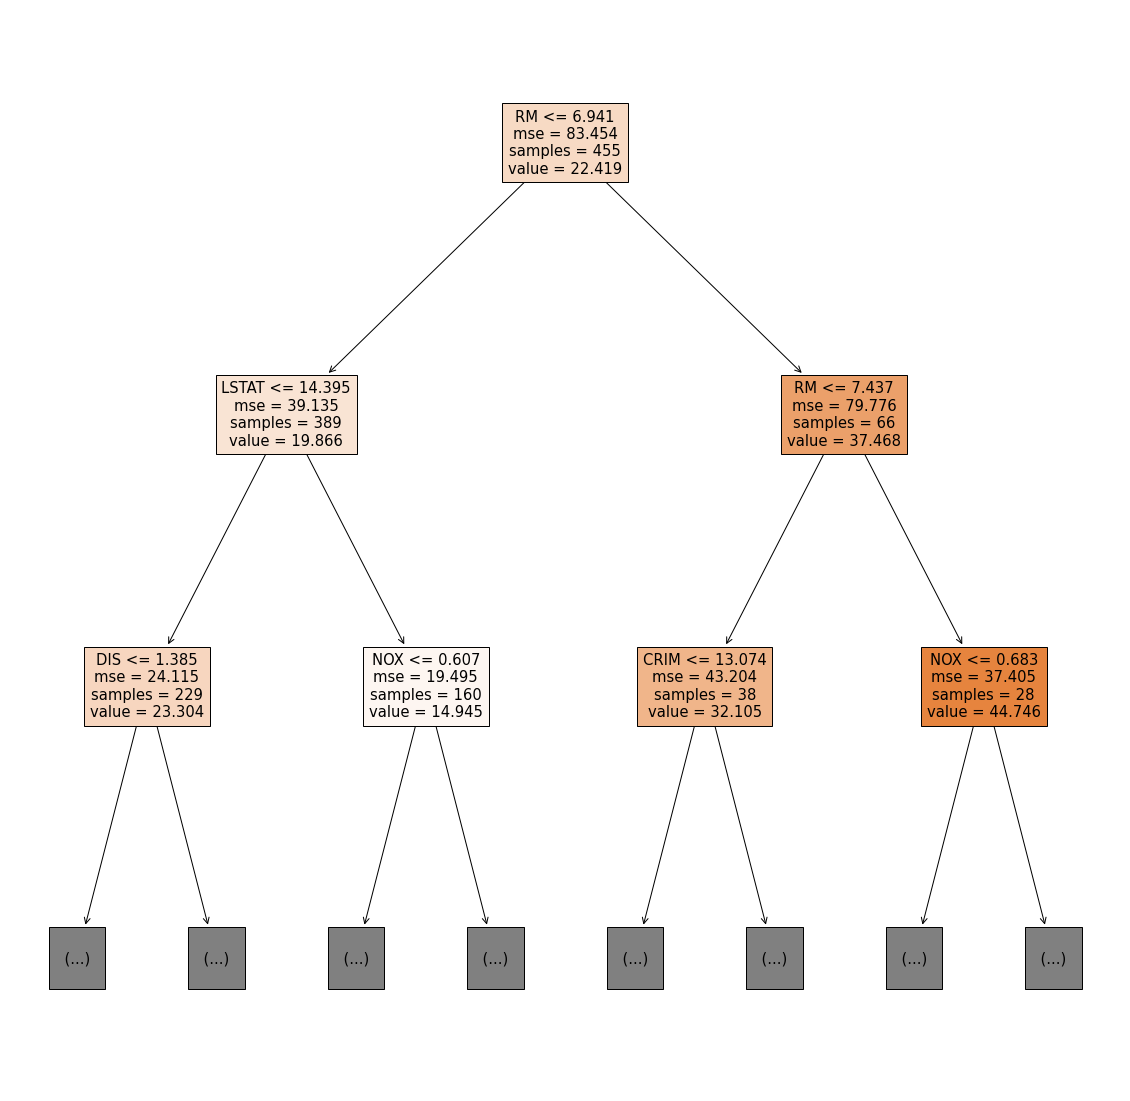

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(reg,
      feature_names=boston['feature_names'],
      filled=True,
      max_depth=2
      )

# gini 猜錯機率
# gini=0 信心程度最高 停止分類

MSE(mean squared error) (回歸版的gini係數): 與平均的平均距離-->越小越好
value: 平均值

RMSE: root squared error 
(但比較RMSE 沒辦法做比較 因為樣本不同 基底也不同) 

MAE: mean absolute error 平均絕對誤差

RMSE (大者更大) 與 MAE 差別: 能夠更看得出有沒有巨大誤差


r square score(0-1) : 大於0.5-->不錯



In [33]:
# 透過驗證: 回頭做參數的選擇調整

from sklearn.metrics import r2_score
pre= reg.predict(x_test)
r2_score(y_test, pre)


0.8146754459110186